# K_Means Clustering

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 20)

Ciceklere ait yaprak olculerinin verildigi bir data seti. Bu datanin bir label' i yok. Oncelikle domain bilgisi olan birinden bilgi almak gerekir. Boyle birisi yoksa bitkiler hakkinda uzman birine danisilir. O kisiden bu datada 3 farkli bitki oldugu bilgisini alinabilirse; bu 3 kume uzerinden cluster' lar nasil kaliteli hale getirilebilir, bunun uzerine calismak gerekir. Uzman destegi yok ise de en iyi cluster' i yapabilmek icin matematiksel hesaplamalara basvurulur.

k-means gercek dunya verileri uzerinde gruplandirma yaparken cok basarili olmadigi icin mutlaka bir uzman destegi alinmalidir. 

In [2]:
df = pd.read_csv("/Users/onurhanaydin/Desktop/Data Science/ML/iris.csv", 
                 usecols=["sepal_length", "sepal_width", "petal_length", "petal_width"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Asagidaki pairplot grafiginde verilerin cok net bir sekilde ikiye ayrildigini ve aralarindaki mesafenin fazla oldugunu gorebiliyoruz. Yogun kisimlardan yeni bir kume olusabilir mi, bunu bu grafikten cikaramiyoruz.

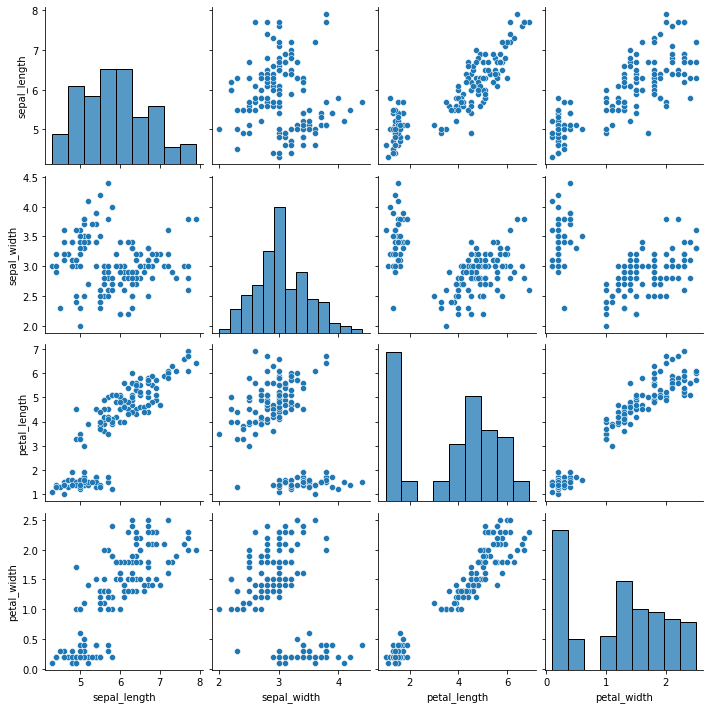

In [5]:
sns.pairplot(df)
plt.show();

## Scaling Data

**The K-means algorithm definitely needs scaling**. However, if all our features are in the same/similar range, **there is no need to scale the data**. For these data, scaling may cause worse results in some cases. You must try both with and without scale and continue with whichever one has good results.

## K_Means Clustering

Bir egitim asamasi yok; benzer paternleri bulma mantigi uzerine calisir. k-means algoritmasi kullanirken mutlaka scale islemi yapilmali, cunku mesafe tabanli calisan bir algoritma. Fakat bu datada sayilar birbirine cok yakin oldugu icin scale islemi skorlari kotulestirdi. Bu yuzden bu data icin scale islemi uygulamayacagiz. 

Egitim icin kullandigimiz bir data yok; butun datayi kullanacagiz.

In [6]:
X = df.copy()

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
X.shape

(150, 4)

In [9]:
from sklearn.cluster import KMeans

In [10]:
K_means_model = KMeans(n_clusters=5, random_state=42)

#### PARAMETERS

N_CLUSTERS -------> Kac kume olussun? (Default=8)

N_INIT -------> Algoritma ilk bolmeyi random olarak yaptigi icin skorlar kotu cikabilir. Bu yuzden ayni islemi defalarca yaptirmak basari oranini artirir. Bu parametre ile random olarak verilen sayida baslangic noktasi belirlenir. Hangisi en iyi kumelemeyi sagliyorsa algoritma onunla devam eder. (10 kere baslangic noktasi belirle, en basarili hangisiyse onunla yoluna devam et) (Default=10)  

INIT --------> (init='k-means++')  Random noktalari verilerin yogunlastigi yerlerin orta noktalarindan secer. En iyi kumeyi bulma islemini hizlandirir. 

MAX_ITER ------> Iterasyon sayisini mauel olarak ayarlamamizi saglar (Default=300). Cok buyuk datalarda 300 yetersiz kalir. Bu durumlarda k-means algoritmasi uyari verir. 

In [11]:
K_means_model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3], dtype=int32)

Supervised modellerde oldugu gibi burada ayri ayri fit ve prediction islemi yok. Fit ya sadece asagidaki gibi tek basina kullanilir ya da yukaridaki gibi predict ile beraber kullanilir. 

Sadece fit kullanilirsa, feature' lardaki ozelliklerin birbirine yakinligina gore paternler tespit edilmis olur. Bu islemden sonra predict kullanilamaz. Bunun yerine __K_means_model.labels__ kullanilir. Hangi gozlem hangi kumeye atanmis, bu islemle gorulebilir. 

__fit_predict__ kullanimi tercih edilirse __labels__ kullanmaya gerek yok; hangi kumeye atama islemi yaptigini gosterir. Kullanimi daha pratik oldugu icin biz bunu tercih edecegiz.

In [12]:
K_means_model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [13]:
K_means_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3], dtype=int32)

X' e tahmin ettigimiz class' lari yeni bir feature olarak ekleyelim :

In [14]:
X["Classes"] = K_means_model.labels_

In [15]:
X

,sepal_length,sepal_width,petal_length,petal_width,Classes
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,4
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,4
148,6.2,3.4,5.4,2.3,4


## Hopkins test

Data kumeleme islemi icin uygun mu? Random olarak mi dagilmis? Bunun icin Hopkins test yapilir.

Eger data non random, uniform ise, dummies feature' lardan olusuyor ise noktalarin birbirlerine olan uzakliklari ayni olur ki boyle datalar clustering icin uygun degildir. Eger datada dummy edilmis feature' lar varsa bunlarin atilmasi gerekir. 

Yukarida ekledigimiz class' i cikarip datayi eski haline getirelim :

In [16]:
X = X.drop("Classes", axis =1)

In [17]:
#!pip install pyclustertend

In [18]:
from pyclustertend import hopkins

In [19]:
X.shape

(150, 4)

Hopkins testin icine data seti ve __sampling_size__ verilir. Cok buyuk datalarda islem hizini artirmak icin sampling_size yerine tum datayi temsil eden bir orneklem verilebilir. Bu datada gozlem sayisi az oldugu icin tum datayi verecegiz :

In [20]:
hopkins(X, X.shape[0])

0.17104441866557718

Hopkins degerinin 0.5' in altinda olmasi, cluster islemi yapabiliriz anlamina geliyor. 0' a ne kadar yakinsa data, cluster islemi icin o kadar uygun demektir. 0.5' in uzerinde deger yukseldikce, datanin clustering islemine uygunlugu azalir. Alinan deger 0.5' in uzerinde ciksa bile mutlaka sonraki islemler de uygulanip skorlar alinmalidir.

Burda degerimizi 0.16 cikmis. Demek ki random bir dagilim var ve cluster islemi yapilabilir. 

In [21]:
hopkins(X, 60)   # Subsample ile de yakin bir skor elde ettik. 

0.1710947032198695

# Choosing The Optimal Number of Clusters

## Elbow metod

Optimal k sayisi Elbow Metod ile belirlenir.

In [22]:
ssd = []                                                 # ssd: sum of squared distance

K = range(2,10)                                          # k icin aralik.

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)                                         # Her yeni k sayisina gore modeli egit.
    ssd.append(model.inertia_)

__model.inertia___ --------> Olusturulan her kume icin kume elemanlarinin merkeze olan uzakliklarini olcer ve bunlarin karesini alir. Cikan degerleri toplar ve ortalamasini alir. Kumelerden hesaplanan degerler ne kadar kucukse, kume elemanlari merkeze o kadar yakin demektir. __Inertia__ degeri yuksek cikarsa kume elemanlari genis alana yayilmis demektir.

mse hesaplanirken tahmin deger ile gercek degerlerin farkinin karesini aliyordu, bu sekilde cezalandirma islemi uyguluyordu. Burda ise kume icinde centroid ile gozlem arasindaki mesafenin karesini alir. Bu yuzden inertia degeri buyur. En az inertia degeri hangi k degerinde cikarsa o k degerini secmek mantikli olur. Cok ic ice girmis datalarda inertia degerinin cok iyi olmasi beklenmez. 

Elbow metoduna gore; keskin dususun durdugu ilk noktadaki k degerini secmek gerekir. Sonraki sert dususler dikkate alinmaz.

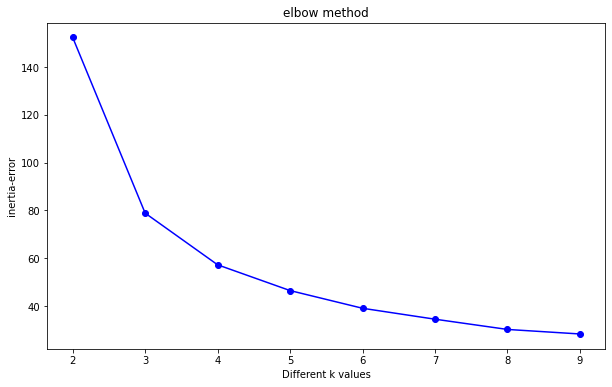

In [23]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") ;

In [24]:
ssd # sum of squared distance

[152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.469495898838,
 30.186555194805194,
 28.289370851370855]

Yukaridaki inertia degerleri arasindaki difference' lara bakarsak ilk keskin dusus noktasinin k=3 oldugunu goruyoruz. Elbow metodunun belirledigi k noktasi bu, asagida bir de yellowbrick' in sectigi k noktasina bakip hangisini almamiz gerektigine karar verecegiz : 

In [25]:
pd.Series(ssd).diff()   

# diff fonksiyonu sadece series ve DataFrame' lerde kullanilabilir. Bu yuzden degerleri series' e cevirdik. 

0          NaN
1   -73.496510
2   -21.622968
3   -10.782291
4    -7.406195
5    -4.570491
6    -4.282941
7    -1.897184
dtype: float64

Yukaridaki negatif degerleri pozitife cevirmek icin basina (-) isareti koyduk. Kume sayisini gorebilmek icin rename ile indexi 1' den baslattik :

In [26]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,73.496510
3,21.622968
4,10.782291
5,7.406195
6,4.570491
7,4.282941
8,1.897184


Keskin dususun durdugu noktanin baslangicinin k=3 oldugunu asagida da goruyoruz :

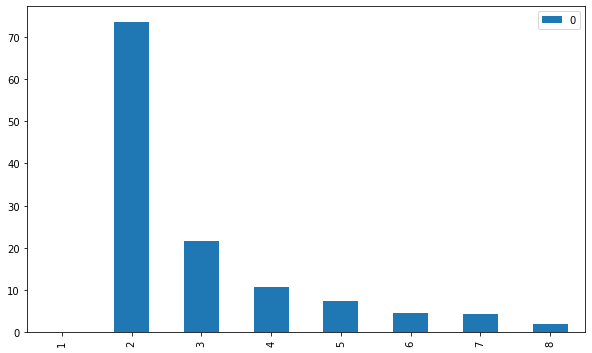

In [27]:
df_diff.plot(kind='bar');

Asagida yellowbrick icine yeniden modelimizi kurup k icin aralik verdik. Modeli yeniden fit ettik. Yellowbrick k=4 degerini secmis. k=3 icin sert bir dusus var fakat k=4' deki dususu daha anlamli bulmus :

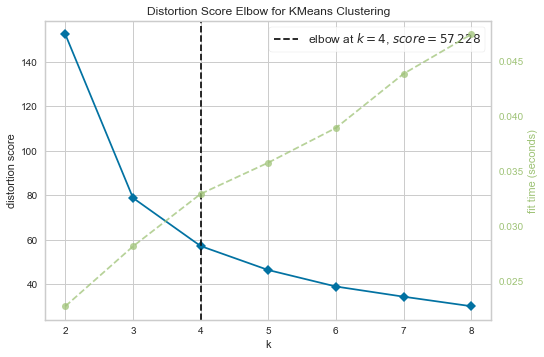

In [28]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

Iki farkli algoritmadan sonuc olarak iki farkli k degeri geldi. Bazen bu yontemlerle buldugumuz k degerleri bile guvenilir olmayabilir. Datada cok daha fazla kume olabilir, ic ice gecmis datalarda bulunan k degeri yaniltici olabilir. Boyle durumlarda uzman destegi almak gerekir.

## Silhouette analysis

Silhouette, yapilan kumelemenin kalitesini olcen bir skorlamadir. 

Inertia, her kume icindeki verilerin merkez etrafinda ne kadar siki kumelendiginin skorunu olcuyordu. Silhouette ise kumelerin hem kendi iclerinde ne kadar siki bir sekilde kumelendigini hem de diger kumeye ne kadar uzak oldugunu olcer. Bu yuzden modelimizin kalitesini olcmek icin bu metodu kullanacagiz :

In [29]:
from sklearn.metrics import silhouette_score

silhouette_score icine once data verilir, sonra da kac label alindiysa bu verilir. Biz yukarida 5 label secmistik (n_clusters=5), silhouette_score icine bunu verdik. Degerimiz 0.488 cikti. Bu deger 1' e ne kadar yakinsa kumeleme o kadar iyi demektir. Bu skorun iyi olup olmadigini diger kume sayilari ile kiyaslayarak karar verecegiz :

In [30]:
silhouette_score(X, K_means_model.labels_)

0.48874888709310643

Silhouette analizinde k icin 2 ile 9 arasinda aralik verip hepsi icin skor almasini istedik. Modeli kurup fit islemini yaptik. Her fit isleminden sonra label' lari aldik. Label sayisina gore de ortalama silhouette_score sonucunu dondurmesini istedik :

In [31]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.6810461692117467
For n_clusters=3, the silhouette score is 0.5528190123564102
For n_clusters=4, the silhouette score is 0.49805050499728803
For n_clusters=5, the silhouette score is 0.48874888709310643
For n_clusters=6, the silhouette score is 0.36483400396700366
For n_clusters=7, the silhouette score is 0.3497481621161219
For n_clusters=8, the silhouette score is 0.3574536925852729


silhouette_score en yukse puani n_clusters=2' de vermis. Fakat yellowbrick sonucuna gore 2' nin cok genis bir alana yayildigini, kendi icinde cok siki kumelenmedigini biliyorduk. Bu yuzden bu degeri dikkate almiyoruz. Sonraki en yuksek skoru __n_clusters=3__' de almis. Elbow metodun sonucuna guvenip bu degeri seciyoruz.

Diyelim ki 3 ve 4 degerleri arasinda kararsizlikta kaldik. O zaman basta cizdirdigimiz pairplot' a bakip ordaki bariz kume sayilarina gore bir karar verebiliriz.

Asagida n_clusters=3 secerek yellowbrick' te visualizer' a baktik. Bu gorsel bize her class' a ait silhouette skorunu verdi. 1 class' inin kendi icinde iyi bir sekilde ic ice girdigini ve diger kumelerden de cok guzel ayrildigini soyleyebiliriz. Ortadaki kirmizi cizgi yukarida n_clusters=3 icin buldugumuz 3 kumenin silhouette_score' unun ortalamasidir (%55).

Gorseldeki renklerin baslangicta kalin olmasi, o kumeye dusen gozlem sayisini gosteriyor. Ne kadar kalinsa o kumeye o kadar fazla gozlem dusmus demektir :

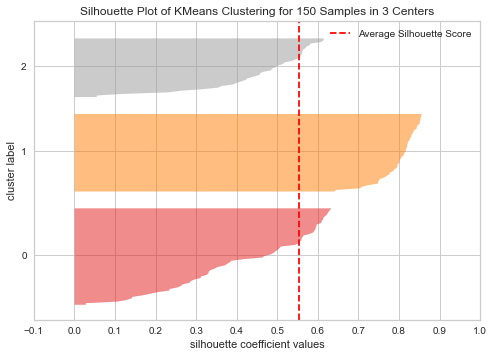

In [32]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

## Building the model based on the optimal number of clusters

n_clusters=3 degerine karar kildik ve buna gore modelimizi kuracagiz :

In [33]:
model = KMeans(n_clusters =3, random_state=42)
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [34]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Tahminlerimiz olan model.labels_' i bir degiskene atadik ve bunu asagida X' e feature olarak ekledik :

In [35]:
clusters = model.labels_

In [36]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
X["predicted_clusters"] = clusters

In [38]:
X

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Asagida gercek kume degerlerimizi okuttuk. Kurdugumuz model ile bu degerler uyusuyor mu buna bakacagiz. Bu bilgiler elde yok ise datanin uzmanlar tarafindan label' lanmasi istenir :

In [40]:
labels = pd.read_csv("/Users/onurhanaydin/Desktop/Data Science/Dersler/Machine Learning/label.csv")
labels

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


X datasina label' i feature olarak ekliyoruz :

In [41]:
X["labels"] = labels

In [42]:
X

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,0,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### CrossTab Function

__crosstab__ fonksiyonu carpraz dogrulama yapar (Confusion Matrix ile ayni mantikta). Bu fonksiyonun icine ilk olarak tahminlerin oldugu feature' in ismi, ikinci olarak da gercek degerlerin oldugu label verilir (veya uzmanlardan alinan label) :

In [43]:
ct = pd.crosstab(X.predicted_clusters, X.labels)
ct

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,48,14
1,50,0,0
2,0,2,36


0 -------> 48 tanesini versicolor, 14 tanesini virginica olarak tahmin etmis. Demek ki 0 kumesi versicolor.

1 ------> 50 tanesini setosa turu olarak tahmin etmis. 1 class' inin setosa oldugunu anliyoruz, hepsini yakalamis.

2 ------> 36 tanesini virginica turu olarak tahmin etmis. Demek ki bu da virginica.

Butun turlerden 50' ser tane vardi. Toplam 16 tane hatali tahmin var. Sadece setosa turunde tam tahmin yapabilmis. Demek ki setosa turu digerlerinden net bir sekilde ayrilmis; versicolor ve virginica turlerinin bilgilerinin ic ice oldugu noktalar var. 

## Adjust Rand Score

In [44]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score icine musteriden alinan gercek label ve modelin tahmin ettigi label sirayla verilir :

In [45]:
adjusted_rand_score(X.labels, X.predicted_clusters)

0.7302382722834697

Adjust Rand Score' u Accuracy score gibi dusunebiliriz. Fakat Accuracy score boyle bir durumda %90 gibi bir skor verir. Fakat burda %73' luk bir skourumuz var. Cunku Adjust Rand Score cezalandirarak skorlama yapar. 16 hata icin %73' luk bir skor verdi. 

Adjust Rand Score' un alinabilmesi icin konuyla ilgili bir uzmandan gercek label' larin verilmesi gerekir. Aksi taktirde bu skor kullanilamaz.

## Visualization Clusters

Bilgilerin ic ice oldugu kisimlari gorebilmek icin datamizi gorsellestirelim. Uzmandan gelen degerler string idi. Fakat gorsellestirmede string deger kullanamayacagimiz icin bunlari sayisal degerlere donusturduk :

In [46]:
X_labels = X.labels.map({"versicolor":0, "setosa":1,"virginica":2})
X_labels

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int64

sepal_length ve sepal_width' i hem X_labels (uzmandan gelen gercek sonuclar) hem de X.predicted_clusters (yaptigimiz tahminler)' e gore gorsellestirecegiz :

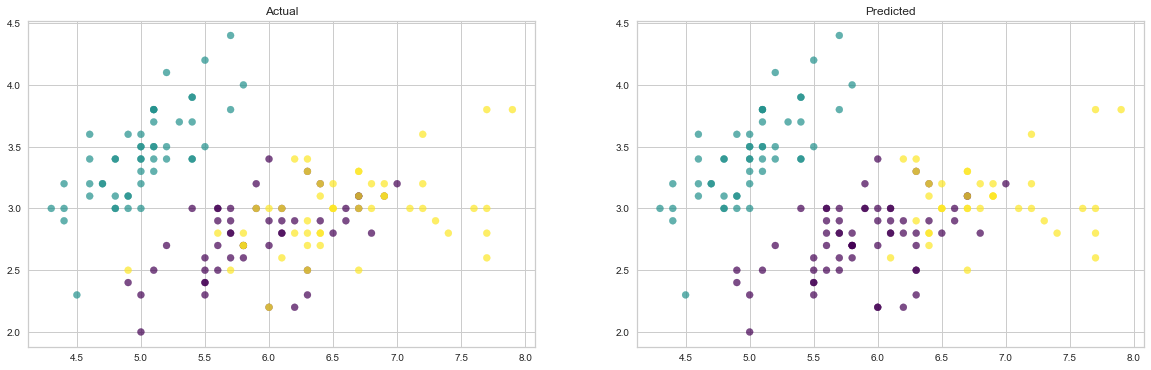

In [47]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X["sepal_length"], X["sepal_width"], c = X_labels, cmap = "viridis", alpha=0.7)  # alpha --> Saydamlik. Ust uste binen degerlerin gorunmesi icin.
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["sepal_length"], X["sepal_width"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.title("Predicted");

Actual grafigine baktigimizda ic ice gecmis bir kisim goruyoruz. Modelimiz tahmin yaparken bu kisimlarda hata yapti. Gercekte sari olan verilerin cogunu mor yapmis. Mavi kisimda hic hata yok cunku veriler birbirinden ayri ise k-means algoritmasi bunlari cok iyi ayirir. 

Bir de sepal_width ve petal_length' e gore bir gorsellestirme yaptik. Verilerin ic ice gectigi kisimlarin yine yanlis tahminlerin yapildigi kisimlar oldugunu gorebiliyoruz :

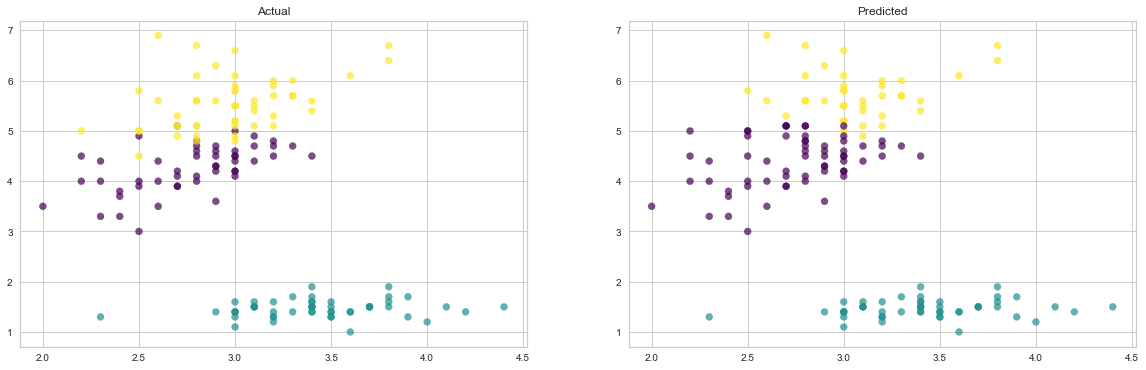

In [48]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X["sepal_width"], X["petal_length"], c = X_labels, cmap = "viridis", alpha=0.7)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["sepal_width"], X["petal_length"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.title("Predicted");

__cluster_centers___ her feature' a ait her class' in koordonatlarini verir. Her sutun bir feature' i temsil eder. Mesela 5.9016129 degeri, 1. feature' in ilk class' inin center' idir :

In [49]:
centers = model.cluster_centers_
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

0. feature' in center degerleri :

In [50]:
centers[:,0] # centers of sepal_length feature

array([5.9016129, 5.006    , 6.85     ])

1. feature' in center degerleri :

In [51]:
centers[:,1] # centers of sepal_width feature

array([2.7483871 , 3.428     , 3.07368421])

0. ve 1. center degerlerini asagida gorsellestirdik. Degerlerden ilk olanlardan biri X eksenine, digeri Y eksenine karsilik geliyor. Mesela X ekseninde 5.9016129 degerine karsilik 2.7483871 degeri geliyor.

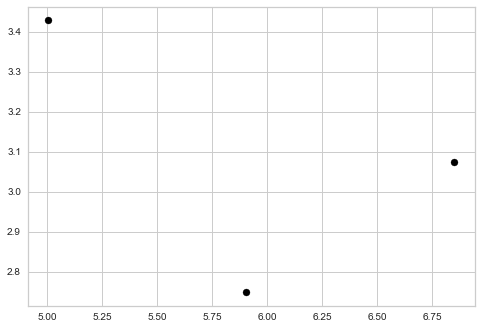

In [52]:
plt.scatter(centers[:,0], centers[:,1], c = "black");

Yukarida buldugumuz bu centroid' leri asagida 0. ve 1. siradaki feature' larin uzerine bindirelim. Center' larin yaptigimiz tahminlere gore orta noktaya yakin bir yerde oldugunu goruyoruz :

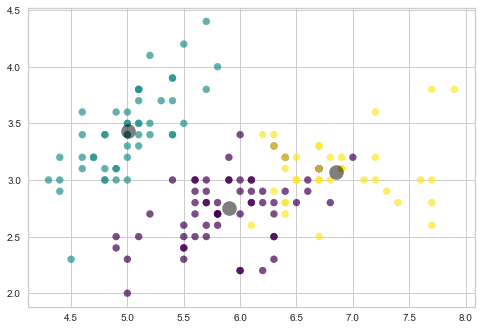

In [53]:
plt.scatter(X["sepal_length"], X["sepal_width"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Remodeling according to discriminating features

k-means ic ice gecmis datalarda basarisiz kaldi. Ic ice olan datalari birbirinden en iyi ayiran feature' lari tespit edip, ona gore yeniden model kurarsak skorlarimizi artirabiliriz. Turler arasi en iyi ayrimi yapan feature' lar ile daha basarili bir model kurulabilir. Bir nevi feature selection islemi.

In [54]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa


Yeniden model kurmadan once gercek label' lari datadan cikaralim :

In [55]:
X.iloc[:, :-1].head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


Tahminlerimizin oldugu feature olan predicted_clusters' a gore groupby yapip bunlarin ortalamasini aldik. Yani her feature' in yaptigimiz tahminlere gore ortalamalarini aldik. Ortalamalar uzerinden, en fazla tespiti yapacak olan feature' i sececegiz :

In [56]:
clus_pred = X.iloc[:, :-1].groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2
sepal_length,5.901613,5.006,6.850000
sepal_width,2.748387,3.428,3.073684
petal_length,4.393548,1.462,5.742105
petal_width,1.433871,0.246,2.071053


Yukarida buldugumuz degerleri lineplot uzerine cizdirdik. sepal_length' te turler cok ic ice olmasa da iyi bir ayrim yok; sepal_width' te cok ic ice gecmisler; petal_length' te ise birbirlerinden ok iyi ayrilmislar; petal_width' te de nispeten guzel bir ayrim var. Son iki feature uzerinden yeni bir k-means algoritmasi kurarak skorlarimizi iyilestirebiliriz :

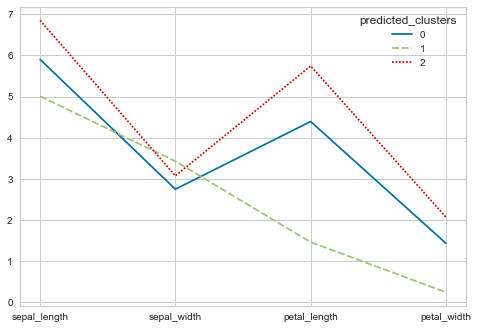

In [57]:
sns.lineplot(data = clus_pred);

Asagida son iki feature' in center' larina bakinca cok fazla ic ice olmadiklarini goruyoruz :

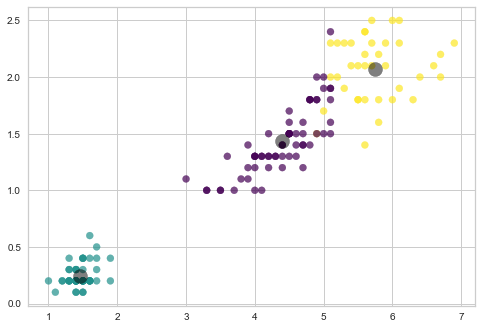

In [58]:
plt.scatter(X["petal_length"], X["petal_width"], c = X.predicted_clusters, cmap = "viridis", alpha =0.7)
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5);

Son iki feature' i sectik, bunlarla yeni bir model kuracagiz :

In [59]:
X2 = X.iloc[:, [2,3]]
X2

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


## Hopkins test

Tum feature' lar ile Hopkins test skoru 0.16 idi. Burda ise 0.10 cikmis. Yani kumelenmeye meyillilik artti :

In [60]:
hopkins(X2, X2.shape[0])

0.10270477467572185

## Elbow metod

In [61]:
ssd = []

K = range(2,10)

for k in K:
    model3 = KMeans(n_clusters =k)
    model3.fit(X2)
    ssd.append(model3.inertia_)

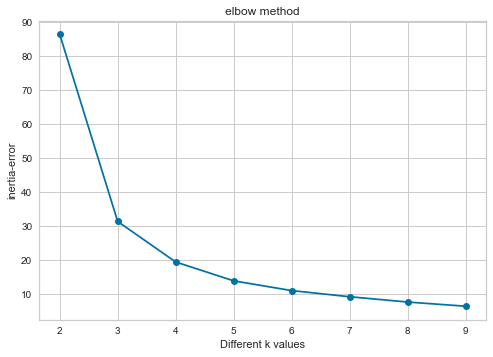

In [62]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method");

Elbow metoduna gore en keskin dususun durdugu nokta yine 3 degerinde. 

In [63]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,55.018861
3,11.905370
4,5.549080
5,2.865480
6,1.809320
7,1.560178
8,1.225437


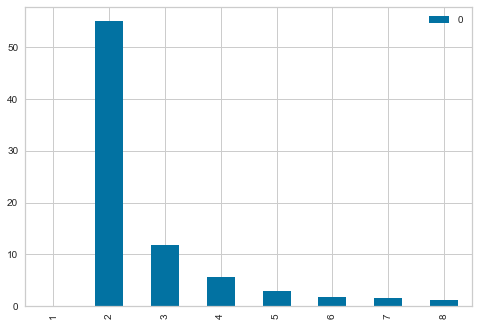

In [64]:
df_diff.plot(kind='bar');

Yellowbrick' e gore de n_clusters=3 :

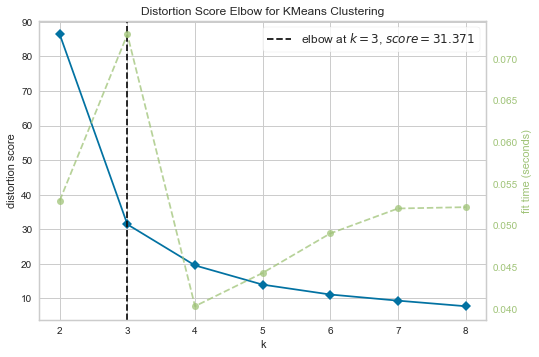

In [65]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();

## Silhouette analysis

n_clusters=3' e gore aldigimiz Silhouette skoru 0.55 idi. Burda ise 0.66' ya yukseldi :

In [66]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.7653904101258123
For n_clusters=3, the silhouette score is 0.6604800083974887
For n_clusters=4, the silhouette score is 0.6127580794464402
For n_clusters=5, the silhouette score is 0.5883732712110276
For n_clusters=6, the silhouette score is 0.576292818723561
For n_clusters=7, the silhouette score is 0.5640984340524553
For n_clusters=8, the silhouette score is 0.5902255624998716


Class' larin kendi icindeki Silhoutte skorlarina bakarsak butun class' larin %65' i gectigini gorebiliriz. Tum class' larda bir iyilesme var :

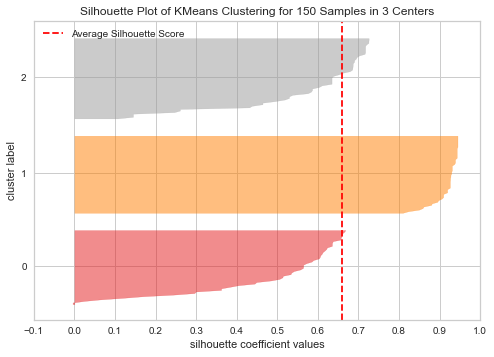

In [67]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

## Building the model based on the optimal number of clusters

Aldigimiz 2 feature ile ve n_clusters=3 ile modelimizi yeniden kurduk, egitimi yaptik :

In [68]:
final_model = KMeans(n_clusters =3, random_state=42)
final_model.fit_predict(X2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [68]:
#final_model.labels_

Musteriden gelen label' lari X2 datamiza ekledik :

In [69]:
X2["labels"] = labels           

Tahminlerimizi de X2' ye ekledik. Bunlara gore yeniden bir R2 skoru alacagiz :

In [70]:
X2["predicted_clusters"] = final_model.labels_

In [71]:
X2.head()

,petal_length,petal_width,labels,predicted_clusters
0,1.4,0.2,setosa,1
1,1.4,0.2,setosa,1
2,1.3,0.2,setosa,1
3,1.5,0.2,setosa,1
4,1.4,0.2,setosa,1


## Adjust Rand Score

Tum feature' lar ile kurdugumuz modelde R2 skoru %73 idi, yeni modelimizde %88 oldu :

In [72]:
adjusted_rand_score(X2.labels, X2.predicted_clusters)

0.8856970310281228

## Compare results

crosstab ile carpraz dogrulamamizi yaptik. Hatamiz yukarida 16 idi, bu modelde 6' ya dustu :

In [73]:
# ct for 2 features
pd.crosstab(X2.predicted_clusters, X2.labels)

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,2,46
1,50,0,0
2,0,48,4


In [74]:
# ct for all features
ct

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,48,14
1,50,0,0
2,0,2,36


## Prediction cluster of new data

Prediction icin modele bir sample verdik ve modelimiz bu degeri 1 sinifina atadi :

In [75]:
new_data = [[1.7, 0.2]]

In [76]:
final_model.predict(new_data)

array([1], dtype=int32)